$\Large{\textbf{Simulando la Urna de Polya con } U(0,1)}$

Definimos las siguientes variables aleatorias;

$X_n := \mathcal{1}${La n-esima pelota extraida es blanca}

$S_n := \sum_{i=1}^n X_n$





Miramos una urna de Polya con m bolas en total, k de ellas blancas y m-k de ellas rojas.

Sea $( U_1, U_1, U_2, \ldots )$ una sucesión de iid Uniformes en $(0, 1)$ y $Z_k \sim B(k,m-k)$ independiente. Definimos:

$$\large{\bf{\hat{S}_n := \sum_{i=1}^n \mathbf{1}\{U_i < Z_k\}, \quad n \geq 1.}}$$



El objetivo del programa es simular esta v.a.,la cual tiene la misma distribuccion que la urna de Pólya, utilizando solamente simulaciones computacionales de variables aleatorias $U(0,1)$. Para lograr esto primero vemos como  simular una distribucion $B(k,n-k)$ usando solo $U(0,1)$

$\Large{\textbf{Proposicion}}$


Sean $X_1,..,X_{n}$ v.a. iid U(0,1), entonces el k-esimo estadistico de orden $Z_k$ tiene distribucion $B(k,n+1-k)$

Demo:
Si $X_1,...,X_n$ son v.a. independientes i.i.d. de densidad $f_X$ y C.D.F. $F_X$ encontes la densidad de $Z_k$ esta dada por:

$f_{Z_k}(x) = k{n \choose k}F(x)^{k-1}(1-F(x))^{n-k}f(x)$ (vease link al final de la demo)

en el caso $X_1 \sim U(0,1)$ nos queda:

$f_{Z_k}(x) = k{n \choose k}x^{k-1}(1-x)^{n-k}\chi_{[0,1]}(x)$


como sabemos que $B(\alpha,\beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}$ y $\Gamma(n) = !(n-1)$

$f_{Z_k}(x) = \frac{1}{B(k,n+1-k)} x^{k-1}(1-x)^{n-k} \chi_{[0,1]}(x)$, por lo que $Z_k \sim B(k,n+1-k)$

$ \square$

link a demo de resultado preliminar: https://math.stackexchange.com/questions/1179371/how-to-find-distribution-of-order-statistic/1179378#1179378

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Simulacion de distribucion Beta 

In [2]:
def beta(k,l):
    #Tenemos n = a+b
    #Simulamos n-1 variables U(0,1)
    u = np.random.uniform(0, 1, k+l-1)
    #Ordenamos 
    estDeOrden = np.sort(u)
    
    return estDeOrden[k-1]

In [3]:
k = 3
l = 4
result = beta(k, l)
print(f"Simulacion de B({k},{l}): {result}")

Simulacion de B(3,4): 0.15195129097743099


$\Large{\textbf{Simulacion de Urna de Pólya}}$


In [ ]:

def urnaDePolya(num_steps, blancas=1, rojas=1):
    
    # Incializamos la variable u0 o Zk
    if blancas == 1 and rojas == 1:
        u0 = np.random.uniform(0, 1)
    else:
        u0 = beta(rojas, blancas)
    
    # Registramos la proporcion de bolas 
    proporcionBlancas = []
    
    for _ in range(num_steps):
        # Generamos un variable uniforme
        u = np.random.uniform(0, 1)
        
        # Comparamos con u0
        if u < u0:
            blancas += 1
        else:
            rojas += 1
        
        # Actualizamos la proporcion de bolas blancas
        total = blancas + rojas
        proporcionBlancas.append(blancas / total)
    
    return proporcionBlancas,u0



$\Large{\textbf{Urna de Polya Clasica}}$

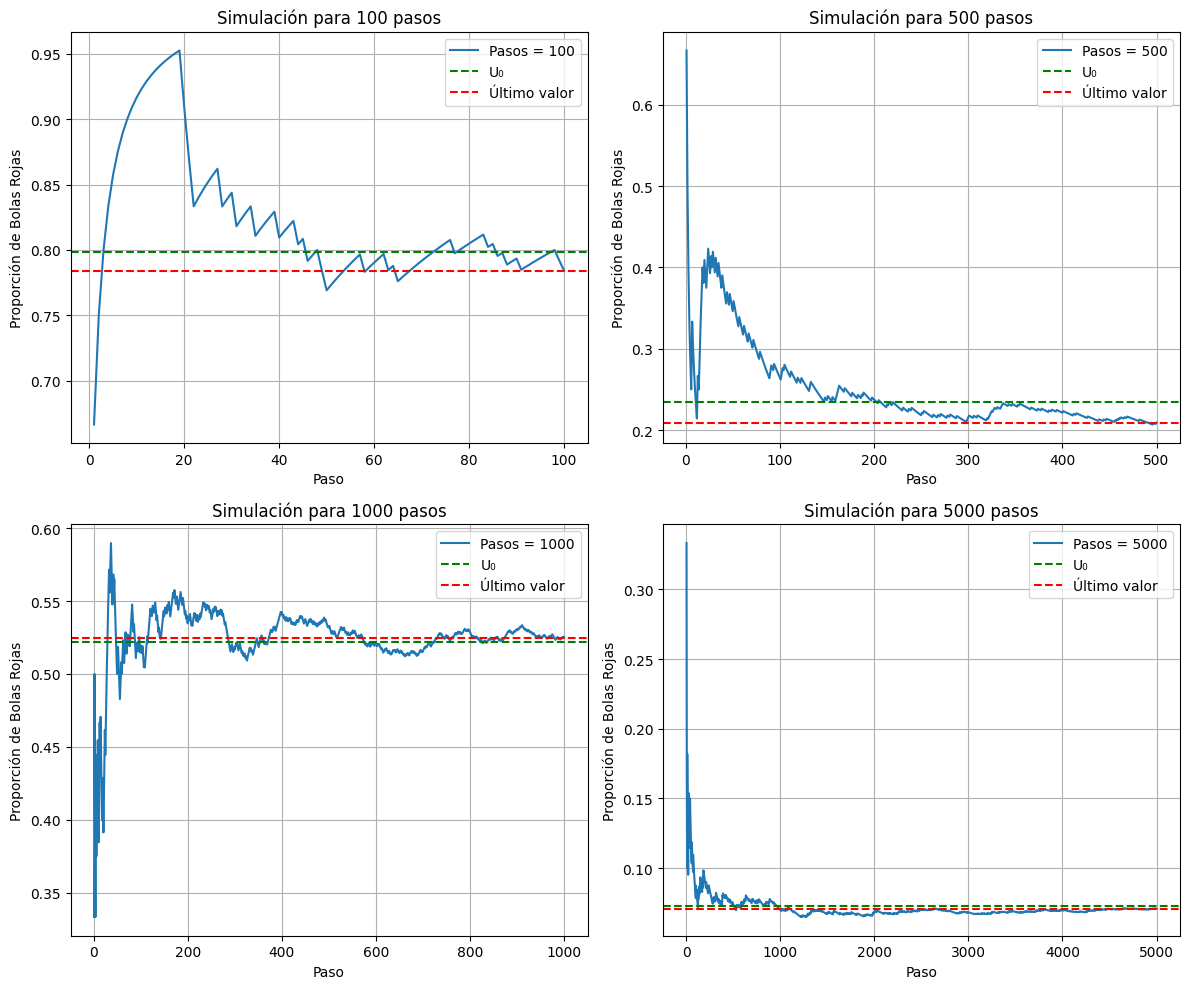

In [ ]:
# Valores iniciales para la simulación
blancas = 1  # Número inicial de bolas blancas
rojas = 1    # Número inicial de bolas rojas
pasos_list = [100, 500, 1000, 5000]  # Diferentes valores de pasos

# Configuración de la figura con subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grilla de subgráficos
axes = axes.flatten()  # Aplanamos para iterar fácilmente

# Generamos y graficamos cada simulación
for i, pasos in enumerate(pasos_list):
    proporcionSim, u0 = urnaDePolya(pasos, blancas, rojas)
    ax = axes[i]
    ax.plot(range(1, pasos + 1), proporcionSim, label=f'Pasos = {pasos}')
    ax.axhline(y=u0, color='g', linestyle='--', label='U₀')
    ax.axhline(y=proporcionSim[-1], color='r', linestyle='--', label='Último valor')
    ax.set_title(f"Simulación para {pasos} pasos")
    ax.set_xlabel("Paso")
    ax.set_ylabel("Proporción de Bolas Rojas")
    ax.legend()
    ax.grid(True)

# Ajustamos el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

$\Large{\textbf{Urna de Polya con 5 blancas y 3 rojas}}$

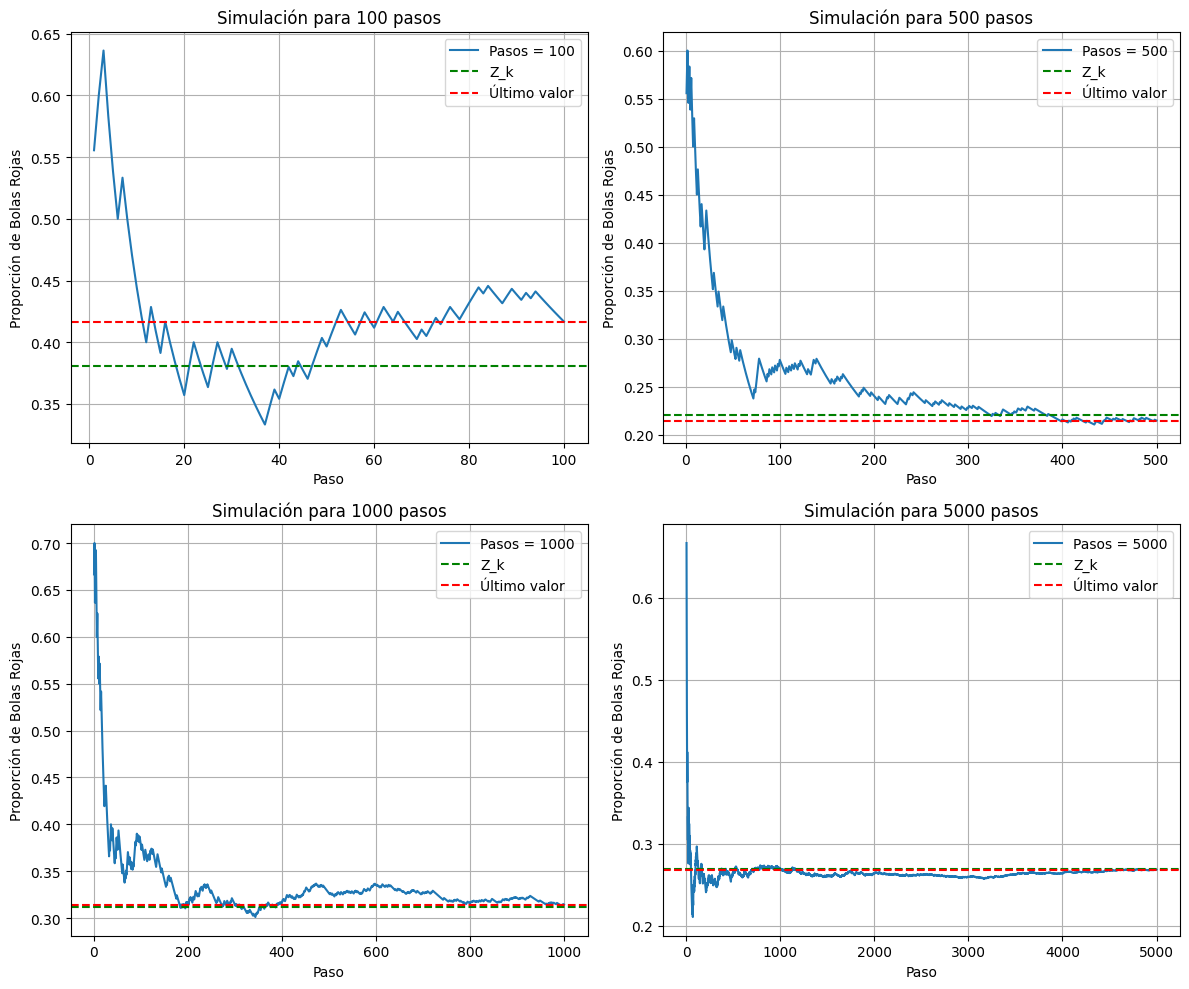

In [ ]:
# Valores iniciales para la simulación
blancas = 5 # Número inicial de bolas blancas
rojas = 3   # Número inicial de bolas rojas
pasos_list = [100, 500, 1000, 5000]  # Diferentes valores de pasos

# Configuración de la figura con subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grilla de subgráficos
axes = axes.flatten()  # Aplanamos para iterar fácilmente

# Generamos y graficamos cada simulación
for i, pasos in enumerate(pasos_list):
    proporcionSim, u0 = urnaDePolya(pasos, blancas, rojas)
    ax = axes[i]
    ax.plot(range(1, pasos + 1), proporcionSim, label=f'Pasos = {pasos}')
    ax.axhline(y=u0, color='g', linestyle='--', label='Z_k')
    ax.axhline(y=proporcionSim[-1], color='r', linestyle='--', label='Último valor')
    ax.set_title(f"Simulación para {pasos} pasos")
    ax.set_xlabel("Paso")
    ax.set_ylabel("Proporción de Bolas Rojas")
    ax.legend()
    ax.grid(True)

# Ajustamos el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

Como podemos observar en las simulaciones, a medida que avanzamos podemos  ver como la proporcion de nuestra se acerca al valor inicial $U_0 \sim  U(0,1)$ y $Z_k \sim Beta(5,3)$ en el caso clasico y (2,5) respectivamente

$\Large{\textbf{Teorema}}$

$$\frac{\hat{S}_n}{n} \xrightarrow{\text{c.s.}} U_0 \quad \text{cuando } n \to \infty$$


Antes de hacer la demostracion de la proposcion, probamos la siguente cota:

Si $0<u<1$ entonces:

$$

\mathbb{E}[| \hat{S}_n - n.u|^4] \le 4n^2\mathbb{E}[\mathbb{1}\{ U_1<u\} - u]
$$



demo:

Definimos $Y_i = \mathbb{1}\{ U_i<u\} - u$, observamos que $\mathbb{E}[Y_i] = 0$

$\mathbb{E}[| \hat{S}_n - n.u|^4] = \mathbb{E}[|\sum_1^n \mathbb{1}\{ U_i<u\} - u|^4] = \sum_{i_1,i_2,i_3,i_4}^n \mathbb{E}[Y_1.Y_2.Y_3.Y_4]$

En el caso en que algun indice $i_j$ aparezca una sola vez; $\mathbb{E}[Y_1.Y_2.Y_3.Y_4] =0$

Si aparecen dos indices, s.p.g. tomamamos $i_1$ y $i_3$ nos queda: $\mathbb{E}[Y_1.Y_2.Y_3.Y_4] = \mathbb{E}[Y_1^2]\mathbb{E}[Y_3^2] = \mathbb{E}[Y_1^2]^2 $

luego:

$\sum_{i_1,i_2,i_3,i_4}^n \mathbb{E}[Y_1.Y_2.Y_3.Y_4] = n.\mathbb{E}[Y_1^4] + {n \choose 2}{4 \choose 2}\mathbb{E}[Y_1^2]^2  \le n.\mathbb{E}[Y_1^4] + 3.n.(n-1).\mathbb{E}[Y_1^4] \le 4.n^2.\mathbb{E}[Y_1^4]$

$ \square$

demo del teorema:

Probando que $\mathbb{P}\left( \left| \frac{1}{n} \hat{S}_n(U_0) - U_0 \right| > \epsilon \right) = 0, $ $\forall \epsilon > 0$ , por Borel Cantelli queda demostrado lo que queremos probar.

$\mathbb{P}\left( \left| \frac{1}{n} \hat{S}_n(U_0) - U_0 \right| > \epsilon \right) =$
$\int_{0}^{1}\mathbb{P}\left( \left| \frac{1}{n} \hat{S}_n(u) - u \right| > \epsilon \right)du$

$\leq \int_0^1 \frac{1}{\epsilon^4} \mathbb{E}\left( \left| \frac{1}{n} \hat{S}_n(u) - u \right|^4 \right) \, du = \frac{1}{n^4 \epsilon^4} \int_0^1 \mathbb{E}\left( \left| \hat{S}_n(u) - nu \right|^4 \right) \, du $

$\leq \frac{4}{n^2 \epsilon^4} \int_0^1 \mathbb{E}\left( \left( \mathbf{1}\{ U_1 < u \} - u \right)^4 \right) \, du = \frac{4}{n^2 \epsilon^4} \int_0^1 \left( u^4 (1 - u) + (1 - u)^4 u \right) \, du $

La serie formada por la cota superior converge, por lo que podemos aplciar Borel Cantelli I

$ \square$